# **Customer Churn Prediction and CLV Optimization**
Welcome to this Google Colab project, where we tackle one of the most pressing challenges faced by the banking industry—**Customer Churn Prediction** and **Customer Lifetime Value (CLV) Optimization**. This notebook, authored by **Hijir Della Wirasti**, documents the end-to-end process of leveraging machine learning and data analytics to provide actionable insights that can help banks retain high-value customers and maximize profitability.

## **Introduction**
In the competitive banking landscape, retaining customers and maintaining profitability are critical for long-term success. **Customer churn**, where customers discontinue their relationship with a bank, results in significant revenue losses and increased costs for acquiring new customers. On the other hand, not all customers contribute equally to profitability, making it essential to identify and retain high-value customers.

This project is designed to answer the following key questions:
1. **Churn Prediction:** Which customers are most likely to churn, and what factors influence their decision to leave?
2. **Customer Lifetime Value (CLV):** How can the bank estimate a customer's long-term value and use it to prioritize retention strategies?

## **Objectives**
- Develop a machine learning model to predict customer churn accurately.
- Conduct Customer Lifetime Value (CLV) analysis to segment customers based on profitability.
- Provide business recommendations to reduce churn and maximize CLV.

## **What This Notebook Covers**
1. **Exploratory Data Analysis (EDA):**
   - Understand customer demographics and behavior patterns.
   - Identify key factors driving churn and CLV.

2. **Feature Engineering:**
   - Transform raw data into meaningful features for machine learning.
   - Handle class imbalance through techniques like SMOTE and undersampling.

3. **Model Training and Evaluation:**
   - Compare multiple machine learning models including CatBoost, Gradient Boosting, Random Forest, and more.
   - Select the best-performing model based on F1-Score, Precision, Recall, and Accuracy.

4. **Hyperparameter Tuning:**
   - Fine-tune the best model (CatBoost) for enhanced performance.

5. **Business Recommendations:**
   - Provide practical strategies for churn reduction and customer retention.

## **Highlights**
- **Best Model:** CatBoost (Oversampled Data - SMOTE) with an **F1-Score of 0.8087**.
- **Key Insights:**
   - Tenure, age, and account balance are the most significant predictors of churn.
   - High-value customers (VIPs) exhibit longer tenure, higher product engagement, and higher account balances.

## **Connect with Me**
- **Name:** Hijir Della Wirasti  
- **LinkedIn:** [https://www.linkedin.com/in/hijirdella/](https://www.linkedin.com/in/hijirdella/)  
- **GitHub:** [https://github.com/hijirdella/Bank-Customer-Churn-Prediction-and-CLV-Optimization](https://github.com/hijirdella/Bank-Customer-Churn-Prediction-and-CLV-Optimization)  



In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.1 MB/s eta 0:00:00


In [3]:
pip install lightgbm


In [4]:
!pip install imbalanced-learn


In [5]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [6]:
# Load data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS3kRFbq5JB7vPwBAy_LEG3RPdWLtXQ_HKnFMsk1EsqSvux0hqJRqapv_kXDP_yma79RZiZXTTXU5dz/pub?output=csv')
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Check missing values
print("Missing Values:")
print(df.isnull().sum())

# Check duplicate values
print("\nDuplicate Values:")
print(df.duplicated().sum())

Missing Values:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Duplicate Values:
0


In [9]:
# Check Churn Percentage
churn_percentage = (df['churn'].value_counts(normalize=True) * 100).round(2)
print("Churn Percentage:")
print(churn_percentage)

Churn Percentage:
churn
0    79.63
1    20.37
Name: proportion, dtype: float64


# Numerical & Categorical

In [ ]:
# Identify numerical and categorical columns
numcols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
catcols = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
print("\nNumerical Columns:", numcols)


Numerical Columns: ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


In [ ]:
df[numcols].describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
print("Categorical Columns:", catcols)

Categorical Columns: ['country', 'gender']


In [ ]:
df[catcols].describe()

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


# EDA

## Univariate Analysis

<Figure size 1200x800 with 0 Axes>

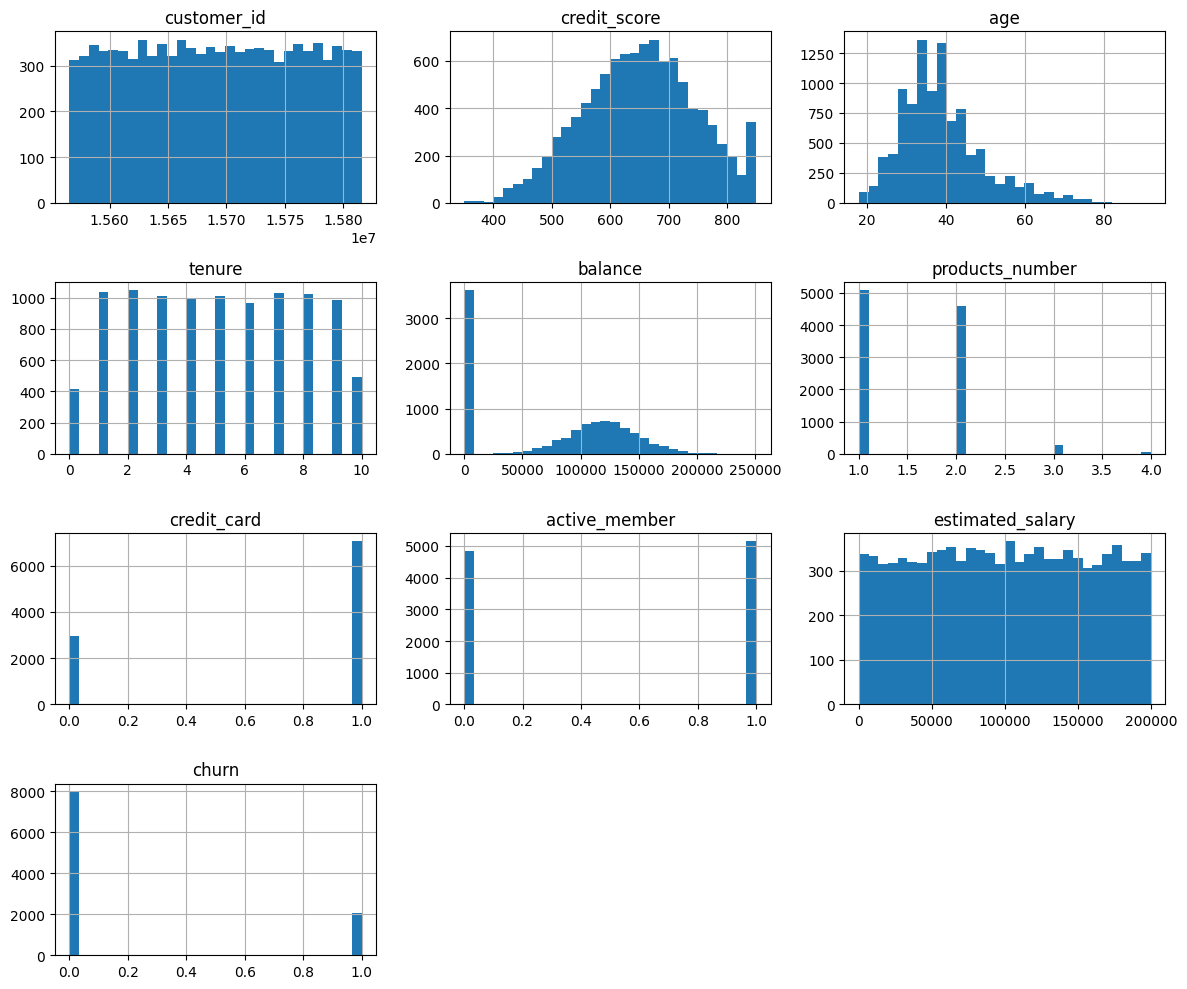

In [ ]:
# Univariate Analysis - Histograms for numerical features
plt.figure(figsize=(12, 8))
df[numcols].hist(bins=30, figsize=(12, 10), layout=(4, 3))
plt.tight_layout()
plt.show()

The univariate analysis provides the distribution of each numerical column.

1. **Customer ID**: Randomly distributed as expected, since it's a unique identifier.
2. **Credit Score**: Normally distributed with most customers having a score between 600 and 800.
3. **Age**: Skewed to the right, indicating most customers are in their 30s or 40s.
4. **Tenure**: Uniformly distributed with slightly fewer customers at 0 and 10 years.
5. **Balance**: Majority of customers have balances between 0 and 200,000, with a peak around 100,000.
6. **Products Number**: Most customers use 1-2 products, with fewer using 3 or 4.
7. **Credit Card**: Binary distribution showing many customers use credit cards.
8. **Active Member**: Similar to credit card, binary distribution with most being active.
9. **Estimated Salary**: Uniformly distributed across the range.
10. **Churn**: The dataset is imbalanced, with more non-churned customers.

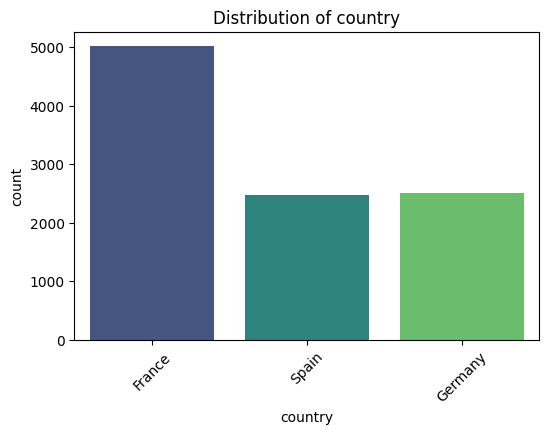

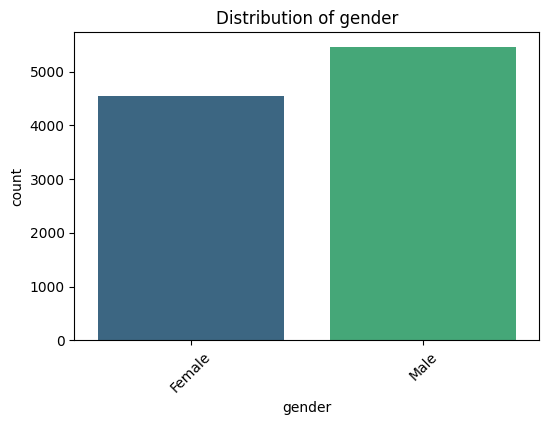

In [ ]:
# Univariate Analysis - Bar charts for categorical features
for col in catcols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

The categorical univariate analysis shows the distribution of two important variables:<br>

Country:
Majority of customers are from France, followed by a smaller but balanced number from Spain and Germany.
This indicates a potential regional concentration of customers, which might influence business decisions for localized strategies.<br>

Gender:
Slightly more customers are male compared to female.
Gender-based differences could be explored further in bivariate and multivariate analyses to understand their impact on churn.

## Bivariate Analysis

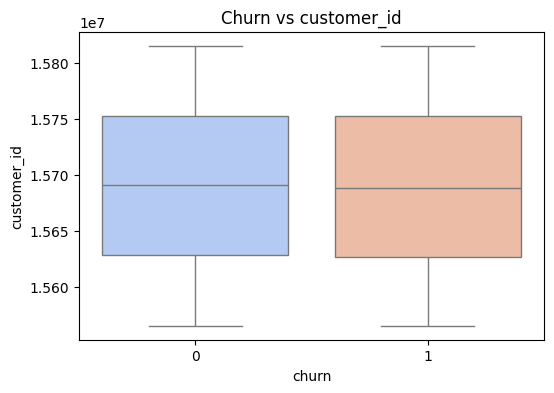

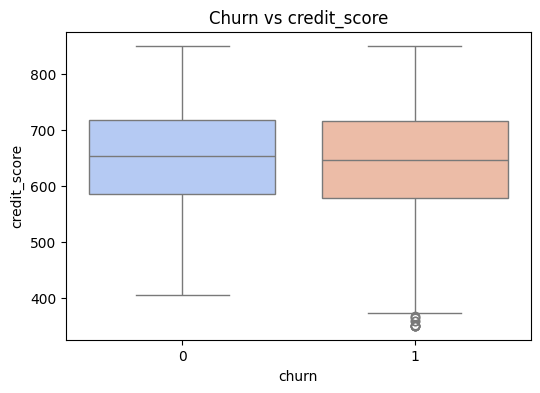

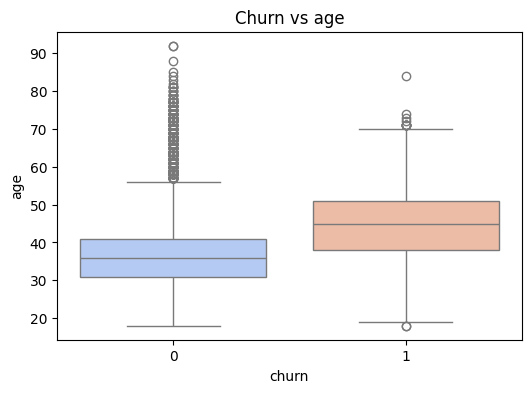

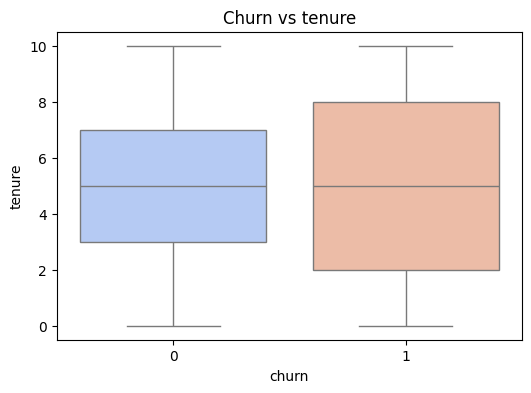

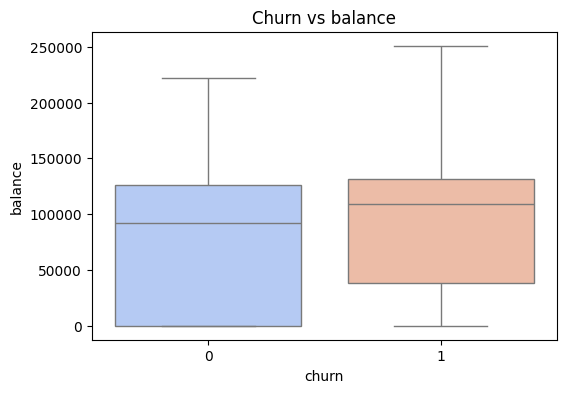

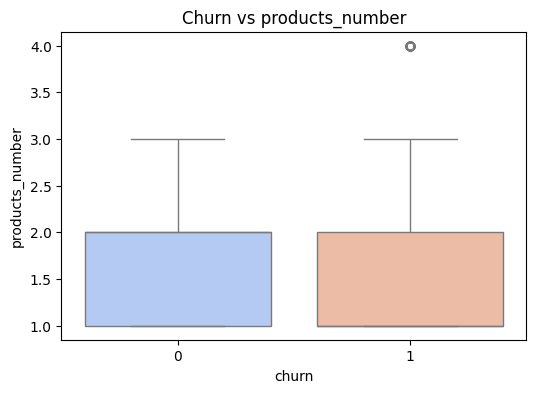

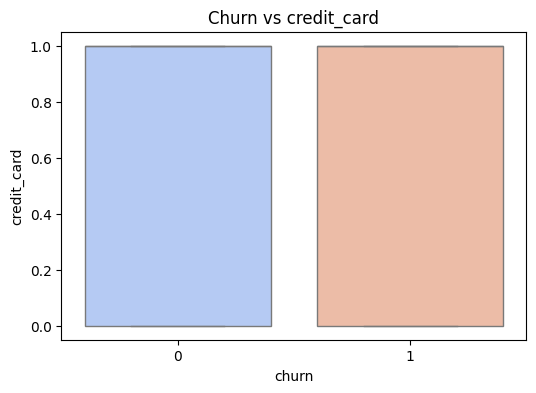

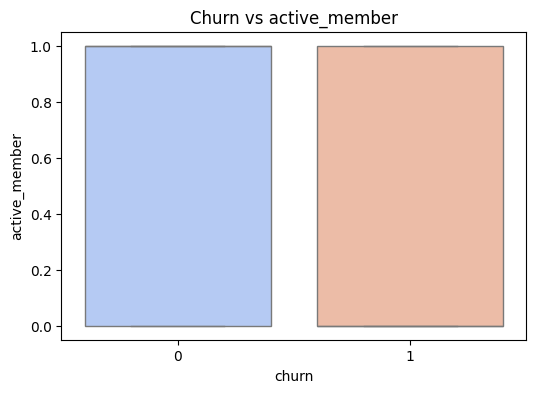

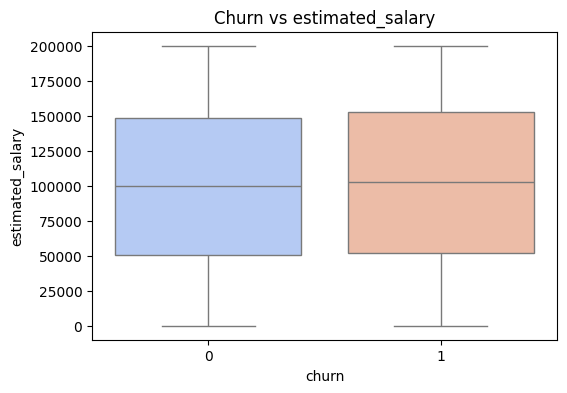

In [ ]:
# Bivariate Analysis - Boxplots for Churn vs Numerical Features
for col in numcols:
    if col != "churn":
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x="churn", y=col, palette="coolwarm")
        plt.title(f"Churn vs {col}")
        plt.show()

The bivariate analysis provides valuable insights about the relationship between churn and numerical features:<br>

Customer ID vs. Churn:<br>
As expected, there is no correlation since customer ID is a unique identifier with no inherent relationship to churn.<br>

Credit Score vs. Churn:<br>
Customers with lower credit scores seem to churn more frequently. Improving credit score-based services may help reduce churn.<br>

Age vs. Churn:<br>
Older customers appear to have a higher likelihood of churn. Tailoring products for this demographic might help improve retention.<br>

Tenure vs. Churn:<br>
There doesn’t appear to be a strong relationship between tenure and churn. However, customers with lower tenure might need more engagement to increase retention.<br>

Balance vs. Churn:<br>
Customers with higher balances are slightly more likely to churn, suggesting potential dissatisfaction despite high financial engagement.<br>

Products Number vs. Churn:<br>
Customers using fewer products are more likely to churn. Encouraging customers to use more products might improve retention.<br>

Credit Card and Active Member vs. Churn:<br>
There is no significant difference between churn and these features, suggesting other factors may play a stronger role.<br>

Estimated Salary vs. Churn:<br>
No notable trend in estimated salary distribution between churned and non-churned customers.

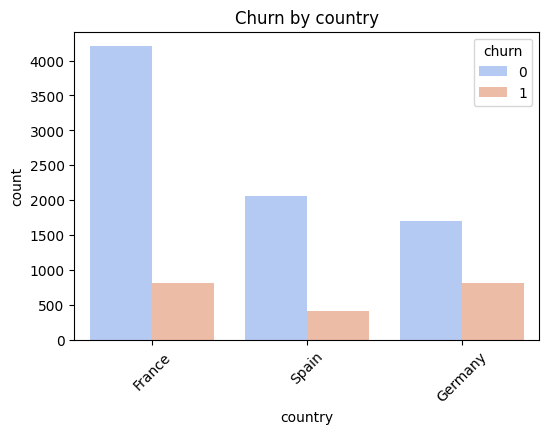

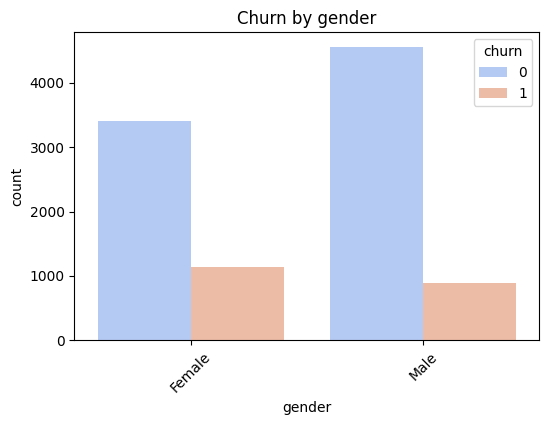

In [ ]:
# Bivariate Analysis - Countplots for Churn vs Categorical Features
for col in catcols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue="churn", palette="coolwarm")
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.show()

The countplots for churn vs categorical features reveal:<br>

Churn by Country:<br>
France has the highest number of churned and non-churned customers, likely because it has the largest customer base.
Proportionally, Spain and Germany exhibit higher churn rates compared to France. This indicates a potential need for country-specific strategies to address customer retention in Spain and Germany.<br>

Churn by Gender:<br>
Both male and female customers show churn, but there seems to be a higher churn rate among female customers proportionally.
This insight suggests that gender-focused campaigns or services could be beneficial in improving retention rates.

## CLV Analysis

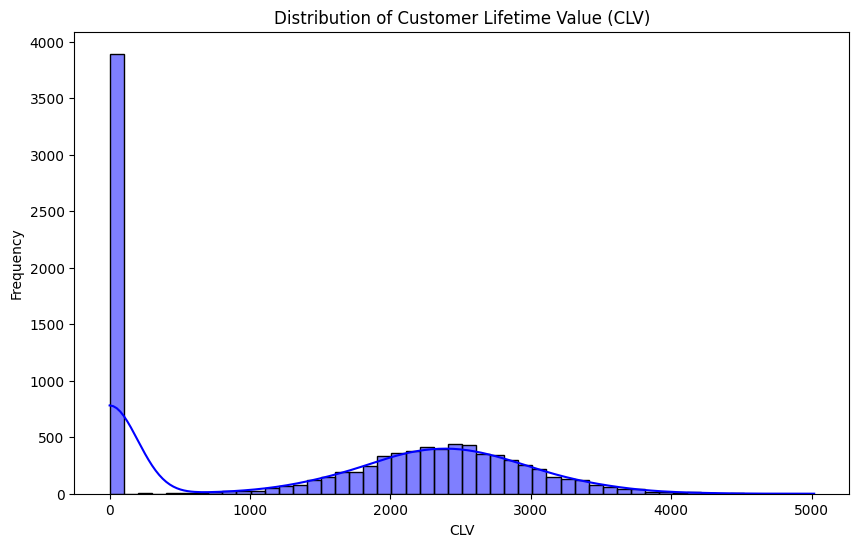


CLV Segment Analysis (EDA):
  CLV Segment     CLV Mean       CLV Sum  Revenue Mean  Tenure Mean
0         Low    46.688768  1.904902e+05    208.404405     4.730392
1      Medium  2049.266225  6.856845e+06   2049.266225     5.205021
2        High  2915.419408  7.273971e+06   2915.419408     5.202806
3         VIP  4000.907256  3.160717e+05   4000.907256     5.455696


In [ ]:
# Step 1: CLV Analysis in EDA

# Copy dataset for CLV analysis
df_clv_eda = df.copy()

# Calculate Revenue (estimated from balance)
df_clv_eda['revenue'] = df_clv_eda['balance'] * 0.02  # Example multiplier for revenue estimation

# Calculate Average Revenue Per User (ARPU)
df_clv_eda['average_revenue'] = df_clv_eda['revenue'] / df_clv_eda['tenure'].replace(0, 1)  # Avoid division by zero

# Calculate CLV as historical revenue
df_clv_eda['CLV'] = df_clv_eda['average_revenue'] * df_clv_eda['tenure']

# Visualize CLV distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clv_eda['CLV'], bins=50, kde=True, color='blue')
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.show()

# Step 2: Segment customers based on CLV using fixed-width bins
df_clv_eda['CLV_segment'] = pd.cut(
    df_clv_eda['CLV'],
    bins=4,  # Fixed 4 bins
    labels=['Low', 'Medium', 'High', 'VIP'],
    include_lowest=True
)

# Step 3: Analyze CLV by Segment
clv_segment_analysis = df_clv_eda.groupby('CLV_segment').agg({
    'CLV': ['mean', 'sum'],
    'revenue': 'mean',
    'tenure': 'mean'
}).reset_index()

# Flatten MultiIndex columns for easier readability
clv_segment_analysis.columns = ['CLV Segment', 'CLV Mean', 'CLV Sum', 'Revenue Mean', 'Tenure Mean']

# Display results
print("\nCLV Segment Analysis (EDA):")
print(clv_segment_analysis)


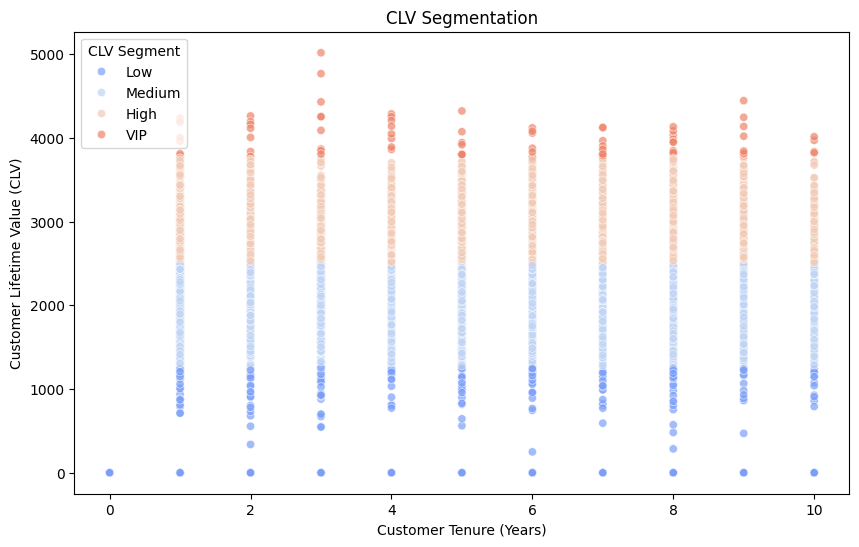

In [ ]:
# Scatter plot for CLV Segmentation Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_clv_eda['tenure'],
    y=df_clv_eda['CLV'],
    hue=df_clv_eda['CLV_segment'],
    palette="coolwarm",
    alpha=0.7
)
plt.title("CLV Segmentation")
plt.xlabel("Customer Tenure (Years)")
plt.ylabel("Customer Lifetime Value (CLV)")
plt.legend(title="CLV Segment")
plt.show()


### **Explanation of CLV Segmentation**

1. **Axes**:
   - **X-Axis (Customer Tenure)**:
     - Represents the number of years a customer has been with the company.
     - Ranges from 0 to 10 years in the dataset.
   - **Y-Axis (Customer Lifetime Value - CLV)**:
     - Represents the total estimated value generated by the customer over their lifetime.
     - Higher CLV values indicate more profitable customers.

2. **Hue (CLV Segments)**:
   - Customers are segmented into **four groups** based on their CLV:
     - **Low (blue)**: Customers with the lowest lifetime value.
     - **Medium (light blue)**: Mid-tier customers.
     - **High (orange)**: Higher-value customers.
     - **VIP (red)**: Customers with the highest lifetime value.

3. **Observations**:
   - **Tenure vs. CLV**:
     - CLV tends to increase with tenure, as longer-tenured customers are more likely to contribute more revenue.
     - However, there are **outliers** with low CLV even at higher tenures, potentially due to low engagement or inactivity.
   - **Segments**:
     - **VIP and High segments (red/orange)** dominate the higher CLV range, indicating these customers contribute the most value.
     - **Low and Medium segments (blue/light blue)** cluster at the lower end of CLV, showing lower profitability.
   - **Distinct Segmentation**:
     - The segmentation aligns well with CLV values, showing a clear progression from Low to VIP customers.

4. **Patterns**:
   - Most VIP customers are concentrated in the **higher tenure range** (6–10 years), indicating loyalty.
   - Customers with **lower tenure** (0–2 years) are predominantly in the **Low and Medium segments**.

### **Key Insights**:
1. **Retention is Key for High CLV**:
   - Customers in the VIP and High segments have longer tenures, emphasizing the importance of retaining them for sustained profitability.
   
2. **Potential to Improve Low CLV Customers**:
   - Short-tenured customers in the Low and Medium segments represent opportunities for growth through targeted campaigns, upselling, or engagement strategies.

3. **Early Engagement**:
   - The clustering of Low CLV customers with short tenures indicates that early-stage customers may need additional support or incentives to transition into higher-value segments.

## Multivariate Analysis

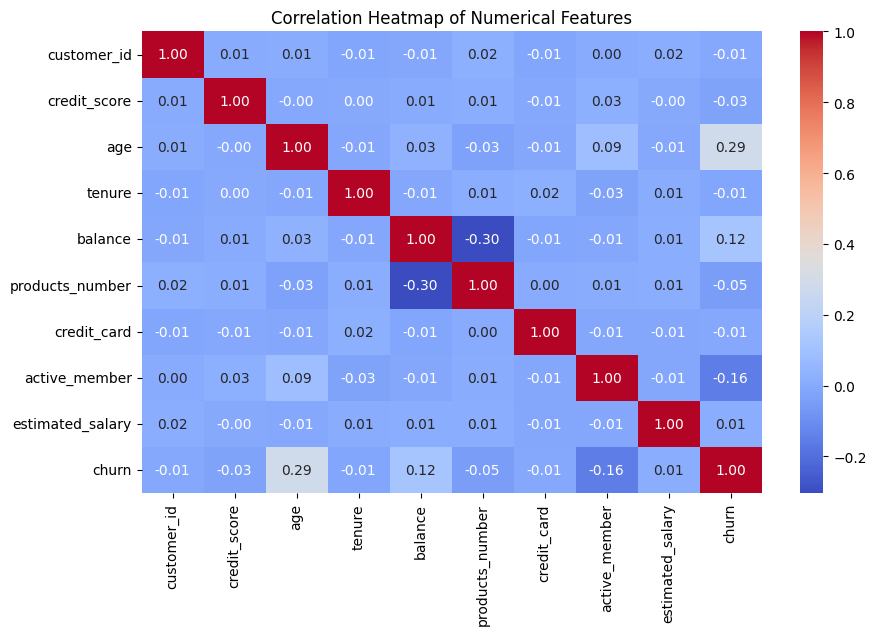

In [ ]:
# Multivariate Analysis - Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numcols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Pre-Processing

## Handle Outliers

In [ ]:
# Data shape before handling outliers
print("Data shape before handling outliers:", df.shape)


Data shape before handling outliers: (10000, 12)


In [ ]:
# Handle outliers using IQR
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numcols].quantile(0.25)
Q3 = df[numcols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
for col in numeric_cols:
    if col not in ['customer_id', 'churn']:
        df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
        df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

# Data shape after handling outliers
print("Data shape after handling outliers:", df.shape)


Data shape after handling outliers: (10000, 12)


The shape of the dataset before and after handling outliers is the same, indicating that **no rows were removed**, and the outliers were capped (adjusted) to fall within the calculated bounds using the IQR method.

### **Why is the Shape Unchanged?**
1. **Capping, Not Removing**:
   - The outliers were capped to the `lower_bound` or `upper_bound`, so no rows were dropped, only their values were adjusted.

2. **Dataset Integrity Maintained**:
   - The process ensured that the dataset retains the same number of observations while making the feature values more robust to extreme data points.



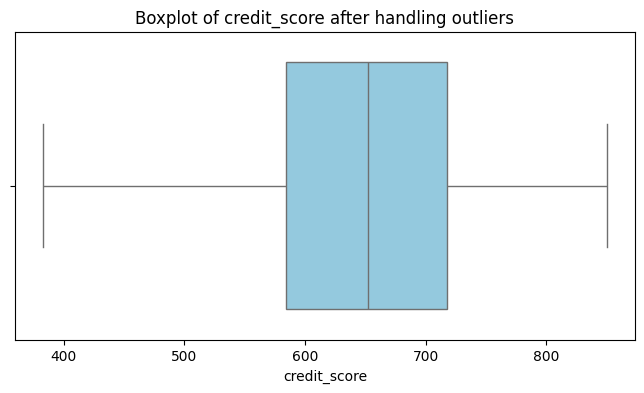

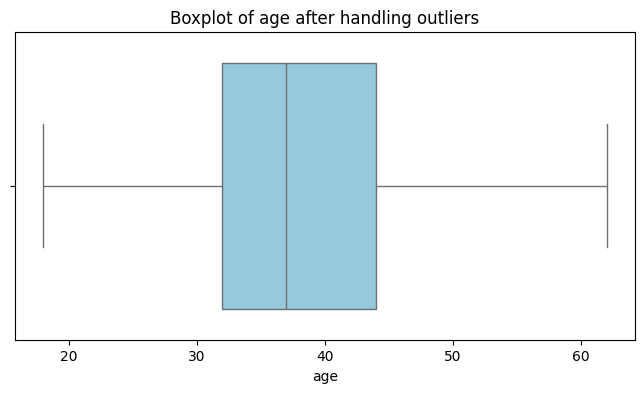

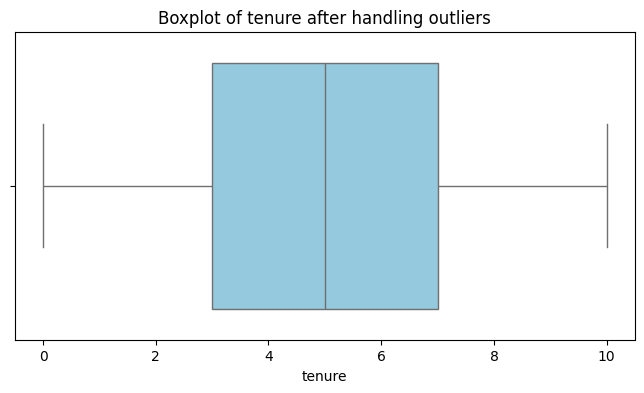

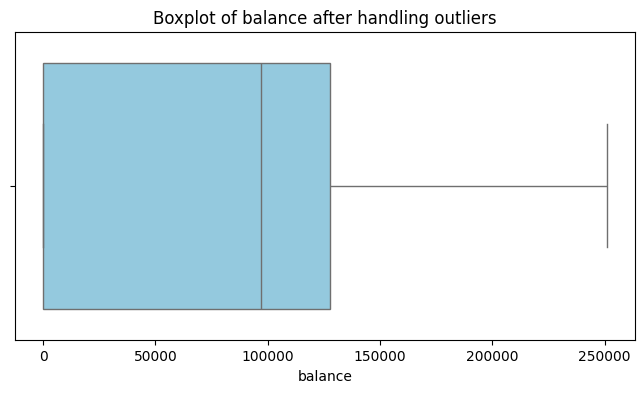

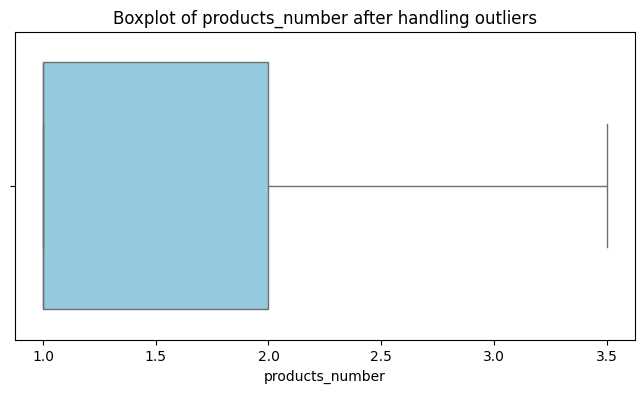

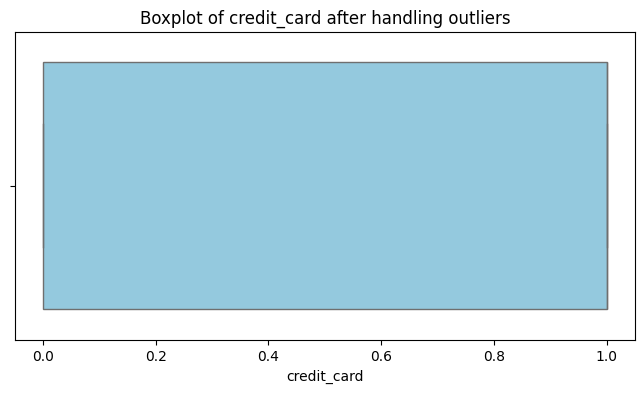

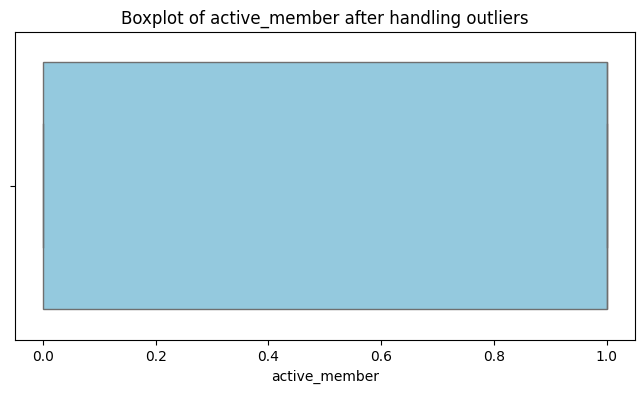

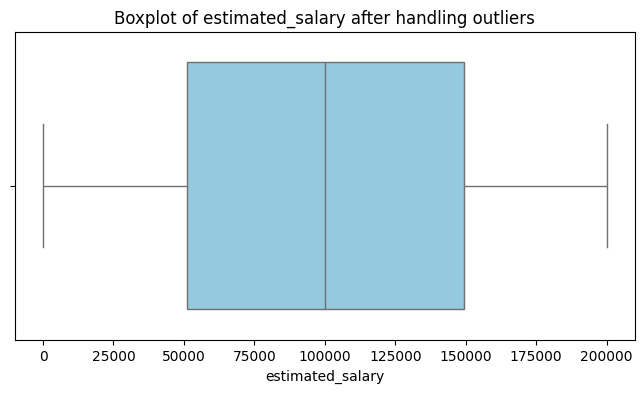

In [ ]:
# Visualize data distribution before and after handling outliers
numcols = df.select_dtypes(include=['float64', 'int64']).columns
numcols = [col for col in numcols if col not in ['customer_id', 'churn']]

# Create boxplots for each numerical column
for col in numcols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col} after handling outliers")
    plt.show()


# Correlation Check

## Uji Chi-Square

In [ ]:
from scipy.stats import chi2_contingency

# Identify categorical columns or columns with a small number of unique values
catcols = df.select_dtypes(include=['object']).columns.tolist()

# Add columns with fewer than 10 unique values (but not of object type)
catcols += [
    col for col in df.columns
    if df[col].nunique() < 10 and df[col].dtype != 'object'
]

# Store Chi-Square test results
chi_square_results = []

# Perform Chi-Square test on each categorical column
for kolom in catcols:
    try:
        # Create contingency table
        tabel_kontingensi = pd.crosstab(df[kolom], df['churn'])

        # Perform Chi-Square test
        chi2, p, dof, expected = chi2_contingency(tabel_kontingensi)

        # Append the results to the list
        chi_square_results.append({'Feature': kolom, 'Chi2': chi2, 'P-value': p})

        # Print the results
        print(f"Uji Chi-Square untuk {kolom}")
        print(f"Chi2 Statistik: {chi2}, p-value: {p}\n")

    except ValueError:
        print(f"Kolom {kolom} tidak bisa dihitung dengan Chi-Square karena terlalu sedikit nilai unik.\n")

# Convert results to a DataFrame
chi_square_results_df = pd.DataFrame(chi_square_results)

# Calculate Chi2 % contribution (percentage of total Chi2)
total_chi2_sum = chi_square_results_df['Chi2'].sum()
chi_square_results_df['Chi2 %'] = (chi_square_results_df['Chi2'] / total_chi2_sum) * 100

# Sort by P-value for easier inspection
chi_square_results_sorted = chi_square_results_df.sort_values(by='P-value')

# Filter insignificant features (P-value >= 0.05 and Chi2 % < 1)
insignificant_features = chi_square_results_sorted[
    (chi_square_results_sorted['P-value'] >= 0.05) &
    (chi_square_results_sorted['Chi2 %'] < 1)
]

# Display the features to drop
print("Features to drop:")
print(insignificant_features[['Feature', 'Chi2', 'P-value', 'Chi2 %']])


Uji Chi-Square untuk country
Chi2 Statistik: 301.25533682434536, p-value: 3.8303176053541544e-66

Uji Chi-Square untuk gender
Chi2 Statistik: 112.91857062096116, p-value: 2.2482100097131755e-26

Uji Chi-Square untuk products_number
Chi2 Statistik: 1503.6293615070408, p-value: 0.0

Uji Chi-Square untuk credit_card
Chi2 Statistik: 0.47133779904440803, p-value: 0.49237236141554686

Uji Chi-Square untuk active_member
Chi2 Statistik: 242.98534164287963, p-value: 8.785858269303703e-55

Uji Chi-Square untuk churn
Chi2 Statistik: 9993.835961897581, p-value: 0.0

Features to drop:
       Feature      Chi2   P-value    Chi2 %
3  credit_card  0.471338  0.492372  0.003878


### **Chi-Square Test Results Analysis & Recommendations**

The Chi-Square test results provide valuable insights into which features have a significant relationship with `churn` and which do not. Here’s the breakdown:

---

### **1. Features with High Significance (P-value < 0.05):**
- **`country`**: Chi2 = 301.25, very small P-value → Strong relationship with `churn`.
- **`gender`**: Chi2 = 112.92, very small P-value → Significant relationship with `churn`.
- **`products_number`**: Chi2 = 1503.63, P-value = 0 → Very strong relationship with `churn`.
- **`active_member`**: Chi2 = 242.98, very small P-value → Strong correlation with `churn`.

---

### **2. Features with No Significant Relationship (P-value >= 0.05):**
- **`credit_card`**: Chi2 = 0.47, P-value = 0.492 → No strong correlation with `churn`.

---

### **3. Features to Drop:**
Features with **P-value >= 0.05** and a **very small Chi2 % contribution (<1%)** can be removed:
- **`credit_card`**: Since it contributes only **0.0038%** to Chi2, it can be dropped as it does not provide predictive value for churn.

---

### **Actionable Recommendations:**
1. **Keep Important Features**  
   - Retain high Chi2 value features like `country`, `gender`, `products_number`, and `active_member` for modeling.

2. **Remove `credit_card` Feature**  
   - This feature does not significantly impact churn prediction and can be excluded to simplify the model.

3. **Further Analysis**  
   - Conduct additional analysis on the key features to explore deeper relationships with `churn`.
   - Use these relevant features in machine learning models to enhance prediction accuracy.


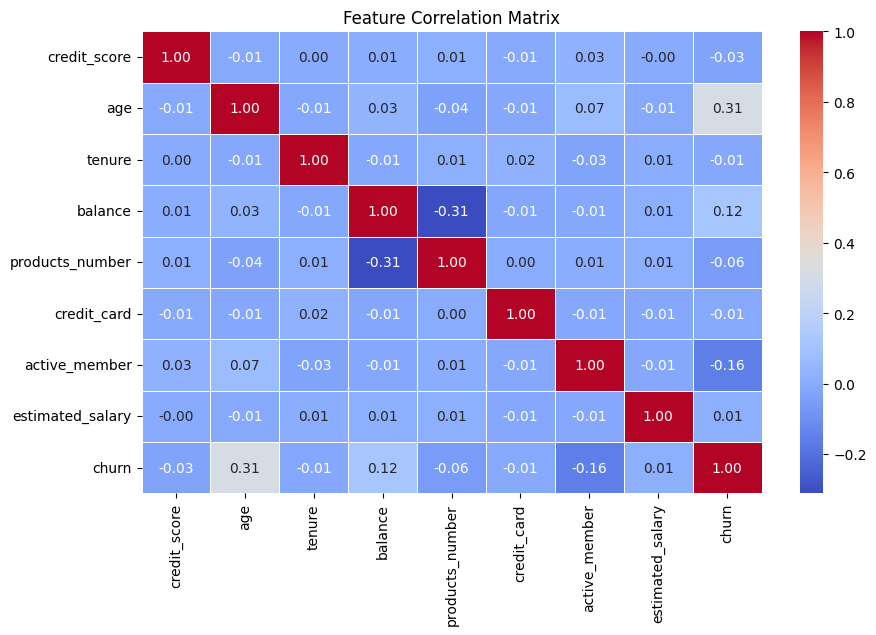

Features to drop due to high correlation: set()


In [ ]:
# Compute correlation matrix for numerical features
numcols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numcols = [col for col in numcols if col not in ['customer_id', 'churn']]

correlation_matrix = df[numcols + ['churn']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Identify highly correlated features (threshold > 0.8)
correlated_features = set()
correlation_threshold = 0.8

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            correlated_features.add(correlation_matrix.columns[i])

# Display features to drop due to high correlation
print("Features to drop due to high correlation:", correlated_features)

The output **`set()`** means that **no features have a correlation higher than the threshold (0.8) with another feature**. This indicates:

1. **No Highly Correlated Features**  
   - All features in your dataset are relatively independent from each other.
   - There is no strong redundancy that requires feature removal.

2. **No Multicollinearity Issue**  
   - Don’t need to worry about multicollinearity affecting model performance.
   - If using linear models (e.g., Logistic Regression), the independent variables are well-separated.

3. **All Features Can Be Kept**  
   - Since no features have been flagged, all can be used for training without concern for redundancy.

---

# Drop Feature

In [ ]:
df = df.drop(columns=['customer_id', 'credit_card'])

✅ customer_id is dropped because it is just an identifier, not a predictive feature.<br>
✅ credit_card is dropped because statistical tests show it is not related to churn.<br>
✅ Feature selection improves model efficiency and accuracy by keeping only relevant variables.<br>

# Feature Encoding

In [ ]:
df_enc = df.copy()
df_enc.head()

,credit_score,country,gender,age,tenure,balance,products_number,active_member,estimated_salary,churn
0,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,101348.88,1
1,608.0,Spain,Female,41.0,1.0,83807.86,1.0,1.0,112542.58,0
2,502.0,France,Female,42.0,8.0,159660.80,3.0,0.0,113931.57,1
3,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,93826.63,0
4,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,79084.10,0


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for binary categorical features
label_enc = LabelEncoder()
df_enc['gender'] = label_enc.fit_transform(df_enc['gender'])
df_enc['active_member'] = label_enc.fit_transform(df_enc['active_member'])

# One-Hot Encoding for multi-class categorical features
df_enc = pd.get_dummies(df_enc, columns=['country'], drop_first=True)

# Display the transformed dataset
print(df_enc.head())

   credit_score  gender   age  tenure    balance  products_number  \
0         619.0       0  42.0     2.0       0.00              1.0   
1         608.0       0  41.0     1.0   83807.86              1.0   
2         502.0       0  42.0     8.0  159660.80              3.0   
3         699.0       0  39.0     1.0       0.00              2.0   
4         850.0       0  43.0     2.0  125510.82              1.0   

   active_member  estimated_salary  churn  country_Germany  country_Spain  
0              1         101348.88      1            False          False  
1              1         112542.58      0            False           True  
2              0         113931.57      1            False          False  
3              0          93826.63      0            False          False  
4              1          79084.10      0            False           True  


# Feature Scalling

✅ No need for Min-Max Normalization before StandardScaler because the data has no extreme outliers

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = df_enc.drop(columns='churn')
y = df_enc['churn']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan StandardScaler ke fitur
X_scaled = scaler.fit_transform(X)

# Menampilkan beberapa baris pertama dari X_scaled
print(pd.DataFrame(X_scaled, columns=X.columns).head())

   credit_score    gender       age    tenure   balance  products_number  \
0     -0.326878 -1.095988  0.342615 -1.041760 -1.225848        -0.924827   
1     -0.440804 -1.095988  0.240011 -1.387538  0.117350        -0.924827   
2     -1.538636 -1.095988  0.342615  1.032908  1.333053         2.583620   
3      0.501675 -1.095988  0.034803 -1.387538 -1.225848         0.829397   
4      2.065569 -1.095988  0.445219 -1.041760  0.785728        -0.924827   

   active_member  estimated_salary  country_Germany  country_Spain  
0       0.970243          0.021886        -0.578736      -0.573809  
1       0.970243          0.216534        -0.578736       1.742740  
2      -1.030670          0.240687        -0.578736      -0.573809  
3      -1.030670         -0.108918        -0.578736      -0.573809  
4       0.970243         -0.365276        -0.578736       1.742740  


### Explanation:

1. **Feature and Target Separation**:
   - `X`: All features except the target (`churn`).
   - `y`: Target column (`churn`).

2. **StandardScaler**:
   - Scales features to have a mean of 0 and standard deviation of 1.
   - Ensures consistent feature scaling for better model performance.

3. **Scaled Data**:
   - All features (e.g., `credit_score`, `age`) are now standardized. For example, `credit_score` of -0.326878 is below the mean.

4. **Why Scaling?**:
   - Avoids larger features dominating the model.
   - Improves model efficiency for algorithms sensitive to scaling (e.g., Logistic Regression, SVM).


# Handle Class Imbalance

## Oversampling (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy=0.5)  # Menambah kelas minoritas hingga mencapai 50% dari kelas mayoritas

# Terapkan SMOTE ke data yang sudah discaling
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Print distribusi kelas setelah SMOTE
print(f'Distribusi kelas sebelum SMOTE: {Counter(y)}')
print(f'Distribusi kelas setelah SMOTE: {Counter(y_smote)}')

# Optional: Tampilkan beberapa baris data hasil resampling
print(pd.DataFrame(X_smote, columns=X.columns).head())

Distribusi kelas sebelum SMOTE: Counter({0: 7963, 1: 2037})
Distribusi kelas setelah SMOTE: Counter({0: 7963, 1: 3981})
   credit_score    gender       age    tenure   balance  products_number  \
0     -0.326878 -1.095988  0.342615 -1.041760 -1.225848        -0.924827   
1     -0.440804 -1.095988  0.240011 -1.387538  0.117350        -0.924827   
2     -1.538636 -1.095988  0.342615  1.032908  1.333053         2.583620   
3      0.501675 -1.095988  0.034803 -1.387538 -1.225848         0.829397   
4      2.065569 -1.095988  0.445219 -1.041760  0.785728        -0.924827   

   active_member  estimated_salary  country_Germany  country_Spain  
0       0.970243          0.021886        -0.578736      -0.573809  
1       0.970243          0.216534        -0.578736       1.742740  
2      -1.030670          0.240687        -0.578736      -0.573809  
3      -1.030670         -0.108918        -0.578736      -0.573809  
4       0.970243         -0.365276        -0.578736       1.742740  


## Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Inisialisasi RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.8)  # Mengurangi jumlah kelas mayoritas hingga mencapai 80% dari jumlah kelas minoritas

# Terapkan RandomUnderSampler ke data yang sudah discaling
X_under, y_under = undersample.fit_resample(X_scaled, y)

# Print distribusi kelas setelah undersampling
print(f'Distribusi kelas sebelum undersampling: {Counter(y)}')
print(f'Distribusi kelas setelah undersampling: {Counter(y_under)}')

# Optional: Tampilkan beberapa baris data hasil resampling
print(pd.DataFrame(X_under, columns=X.columns).head())

Distribusi kelas sebelum undersampling: Counter({0: 7963, 1: 2037})
Distribusi kelas setelah undersampling: Counter({0: 2546, 1: 2037})
   credit_score    gender       age    tenure   balance  products_number  \
0      0.905595 -1.095988 -0.580820 -0.695982  0.731614         0.829397   
1     -0.171524 -1.095988  0.650427 -1.041760 -1.225848        -0.924827   
2     -0.647942  0.912419 -0.888632 -0.695982  0.617383        -0.924827   
3     -1.352212  0.912419 -0.478216 -0.695982 -1.225848         0.829397   
4      1.019521 -1.095988  0.547823 -1.733315 -0.079945         0.829397   

   active_member  estimated_salary  country_Germany  country_Spain  
0       0.970243         -1.255880        -0.578736       1.742740  
1       0.970243          0.754127        -0.578736      -0.573809  
2      -1.030670          1.334923        -0.578736      -0.573809  
3       0.970243          0.080228        -0.578736      -0.573809  
4      -1.030670          0.886727         1.727904      -0.57

### Explanation of Oversampling and Undersampling:

1. **Oversampling (SMOTE)**:
   - **Purpose**: Balances the dataset by increasing the minority class samples.
   - **How**: SMOTE generates synthetic samples for the minority class using interpolation.
   - **Result**: The minority class is increased to 50% of the majority class, improving model performance on the minority class.

2. **Undersampling (RandomUnderSampler)**:
   - **Purpose**: Balances the dataset by reducing the majority class samples.
   - **How**: RandomUnderSampler randomly removes samples from the majority class.
   - **Result**: The majority class is reduced to 80% of the minority class, ensuring balance without oversampling.

### Key Differences:
- **SMOTE** increases the dataset size by adding synthetic samples, while **RandomUnderSampler** reduces the dataset size by removing majority class samples.
- Oversampling is beneficial for retaining all data points, while undersampling avoids synthetic data but loses some original majority class data.

Both techniques prepare balanced datasets for better model performance.

## Split Data

In [ ]:
# Split data into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split # Import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=42, stratify=y_under)

### Key Points:

1. **Purpose**: The `train_test_split` function splits the dataset into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

2. **Scenarios**:
   - **Original Dataset**: `X_scaled, y` split to retain original imbalance.
   - **SMOTE Dataset**: `X_smote, y_smote` split to use the oversampled balanced dataset.
   - **Undersampled Dataset**: `X_under, y_under` split to use the reduced balanced dataset.

3. **Stratification**:
   - Ensures the class distribution in training and testing sets is proportional to the original dataset.

4. **Random State**:
   - Ensures reproducibility of splits by setting `random_state=42`.

Each split prepares data for evaluating how balancing methods (SMOTE or undersampling) affect model performance.

# Modeling

In [ ]:
# Define 10 models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

In [ ]:
# Function to train and evaluate models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix # Import necessary metrics functions

def train_evaluate(models, X_train, X_test, y_train, y_test, dataset_type):
    results = []

    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Compute metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store results
        results.append([dataset_type, name, accuracy, precision, recall, f1])

        # Print classification report
        print(f"Dataset: {dataset_type} | Model: {name}")
        print(classification_report(y_test, y_pred))
        print("-" * 50)

        # Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {name} ({dataset_type})')
        plt.show()

    return results

Dataset: Normal | Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.63      0.23      0.34       407

    accuracy                           0.82      2000
   macro avg       0.73      0.60      0.62      2000
weighted avg       0.79      0.82      0.78      2000

--------------------------------------------------


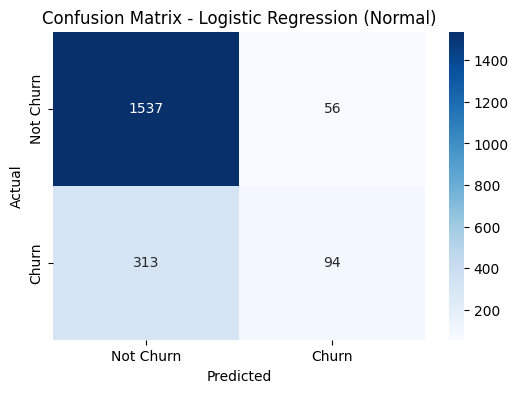

Dataset: Normal | Model: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.46      0.58       407

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

--------------------------------------------------


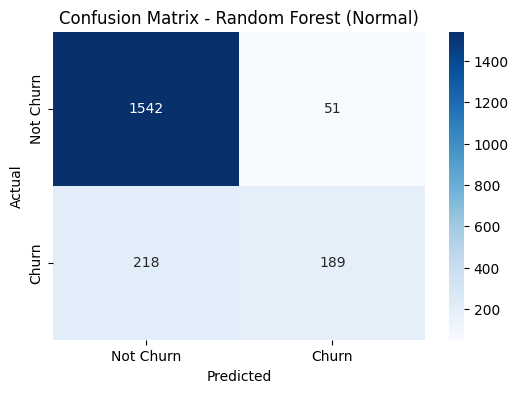

Dataset: Normal | Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.80      0.49      0.61       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.77      2000
weighted avg       0.87      0.87      0.86      2000

--------------------------------------------------


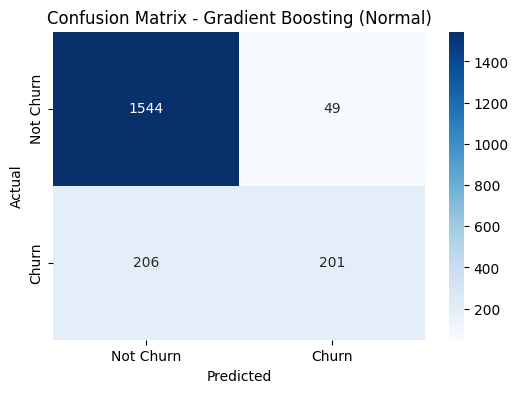

Dataset: Normal | Model: AdaBoost
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.73      0.46      0.56       407

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000

--------------------------------------------------


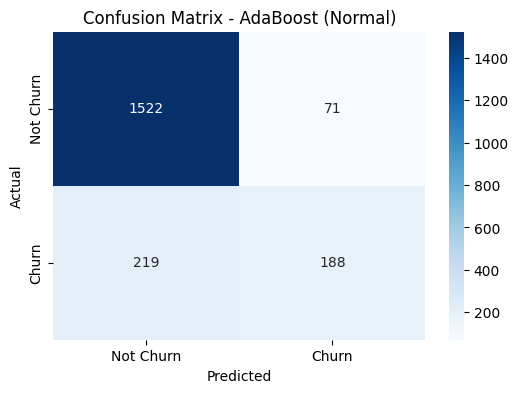

Dataset: Normal | Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.84      0.38      0.52       407

    accuracy                           0.86      2000
   macro avg       0.85      0.68      0.72      2000
weighted avg       0.86      0.86      0.84      2000

--------------------------------------------------


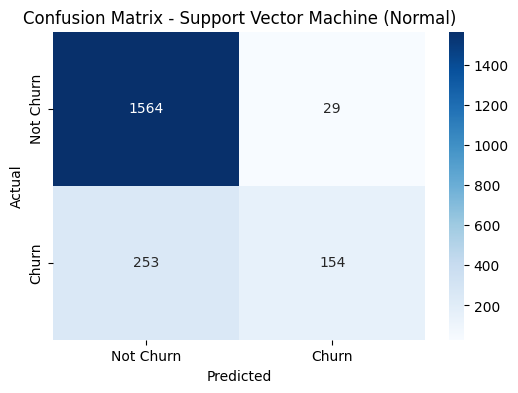

Dataset: Normal | Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1593
           1       0.68      0.40      0.50       407

    accuracy                           0.84      2000
   macro avg       0.77      0.68      0.70      2000
weighted avg       0.82      0.84      0.82      2000

--------------------------------------------------


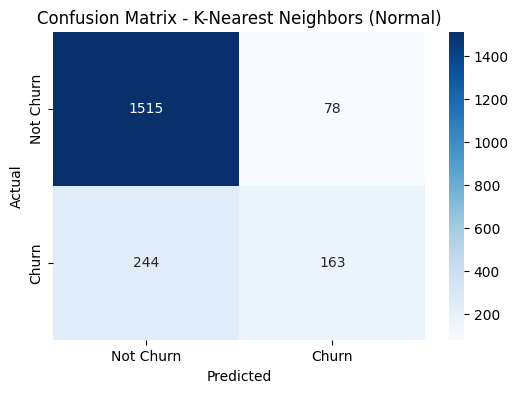

Dataset: Normal | Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1593
           1       0.60      0.36      0.45       407

    accuracy                           0.82      2000
   macro avg       0.72      0.65      0.67      2000
weighted avg       0.80      0.82      0.80      2000

--------------------------------------------------


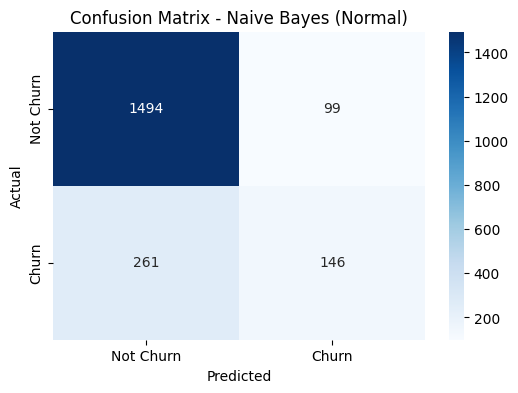

Dataset: Normal | Model: Decision Tree
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1593
           1       0.47      0.54      0.50       407

    accuracy                           0.78      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.80      0.78      0.79      2000

--------------------------------------------------


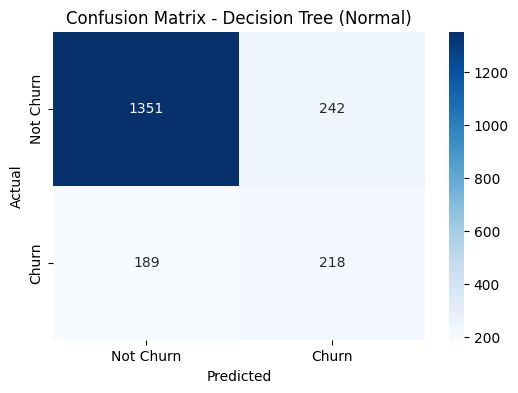

Dataset: Normal | Model: XGBoost
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.67      0.50      0.57       407

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000

--------------------------------------------------


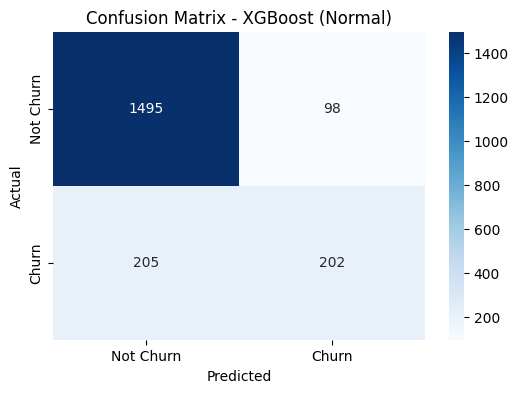

[LightGBM] [Info] Number of positive: 1630, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
Dataset: Normal | Model: LightGBM
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.47      0.58       407

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

--------------------------------------------------


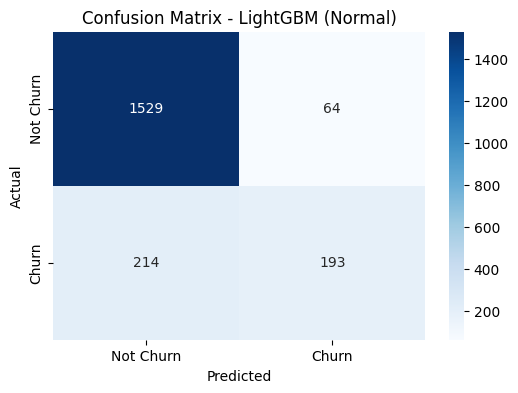

Dataset: Normal | Model: CatBoost
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.48      0.59       407

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000

--------------------------------------------------


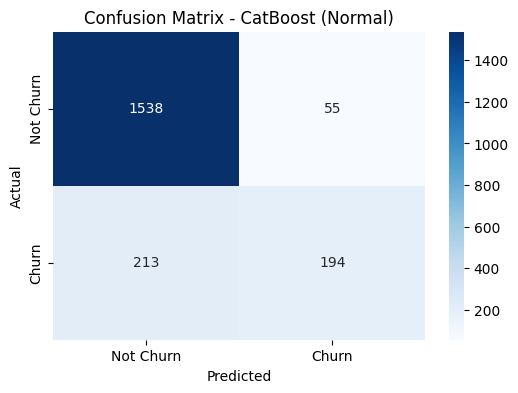

Dataset: Oversampled | Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1593
           1       0.67      0.47      0.55       796

    accuracy                           0.74      2389
   macro avg       0.72      0.67      0.69      2389
weighted avg       0.73      0.74      0.73      2389

--------------------------------------------------


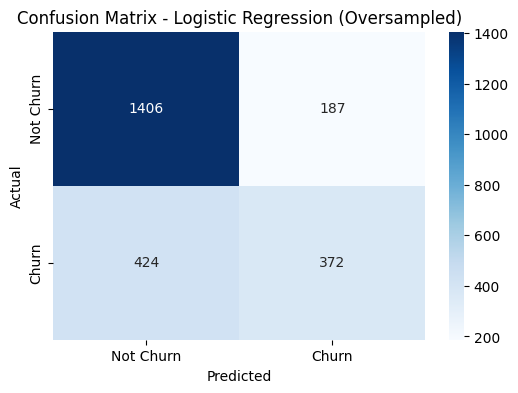

Dataset: Oversampled | Model: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.94      0.90      1593
           1       0.85      0.73      0.79       796

    accuracy                           0.87      2389
   macro avg       0.86      0.83      0.85      2389
weighted avg       0.87      0.87      0.87      2389

--------------------------------------------------


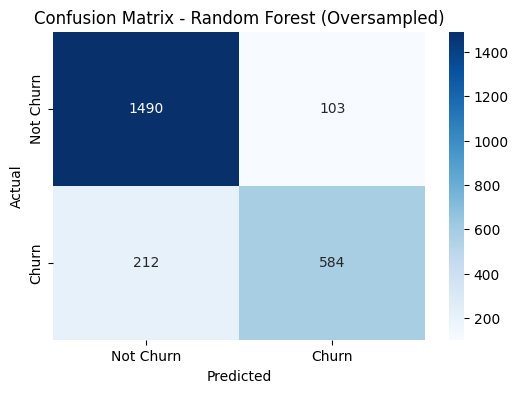

Dataset: Oversampled | Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1593
           1       0.83      0.67      0.74       796

    accuracy                           0.84      2389
   macro avg       0.84      0.80      0.82      2389
weighted avg       0.84      0.84      0.84      2389

--------------------------------------------------


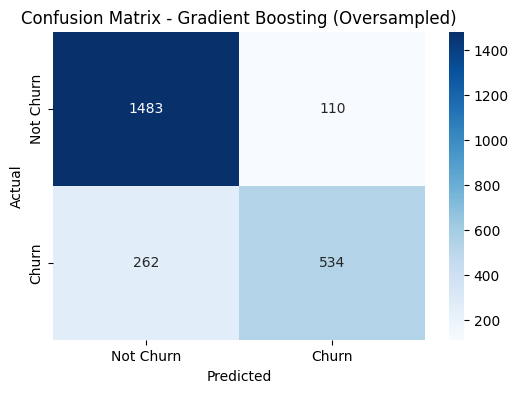

Dataset: Oversampled | Model: AdaBoost
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1593
           1       0.77      0.61      0.68       796

    accuracy                           0.81      2389
   macro avg       0.79      0.76      0.77      2389
weighted avg       0.80      0.81      0.80      2389

--------------------------------------------------


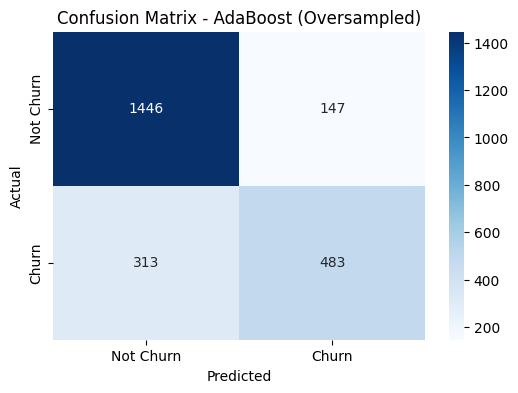

Dataset: Oversampled | Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1593
           1       0.80      0.60      0.68       796

    accuracy                           0.82      2389
   macro avg       0.81      0.76      0.78      2389
weighted avg       0.81      0.82      0.81      2389

--------------------------------------------------


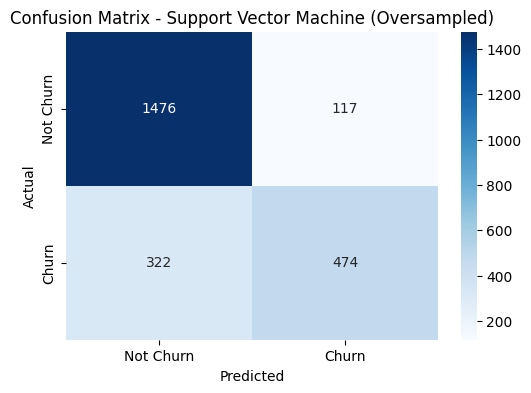

Dataset: Oversampled | Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1593
           1       0.73      0.74      0.74       796

    accuracy                           0.82      2389
   macro avg       0.80      0.80      0.80      2389
weighted avg       0.82      0.82      0.82      2389

--------------------------------------------------


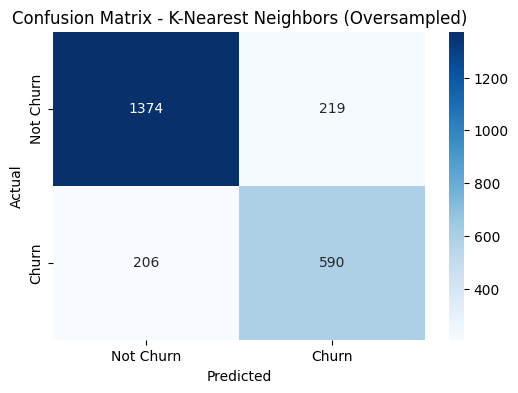

Dataset: Oversampled | Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1593
           1       0.68      0.56      0.62       796

    accuracy                           0.77      2389
   macro avg       0.74      0.72      0.72      2389
weighted avg       0.76      0.77      0.76      2389

--------------------------------------------------


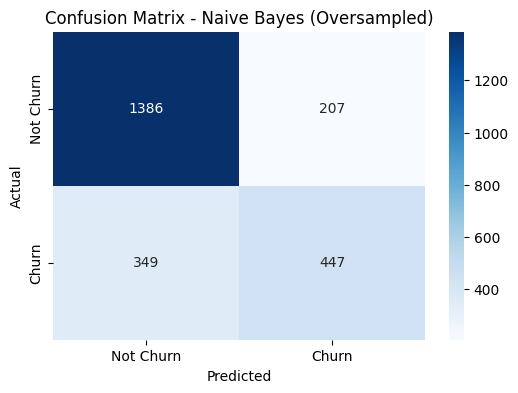

Dataset: Oversampled | Model: Decision Tree
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1593
           1       0.68      0.70      0.69       796

    accuracy                           0.79      2389
   macro avg       0.77      0.77      0.77      2389
weighted avg       0.79      0.79      0.79      2389

--------------------------------------------------


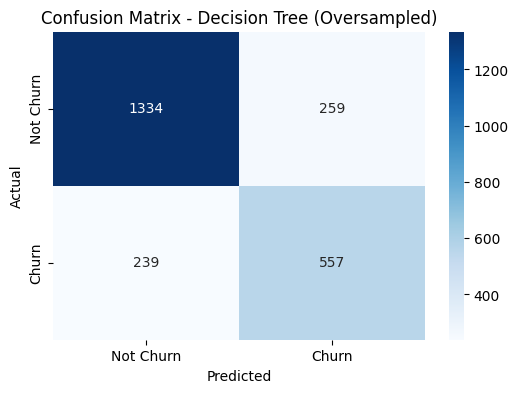

Dataset: Oversampled | Model: XGBoost
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1593
           1       0.84      0.74      0.79       796

    accuracy                           0.87      2389
   macro avg       0.86      0.84      0.85      2389
weighted avg       0.87      0.87      0.86      2389

--------------------------------------------------


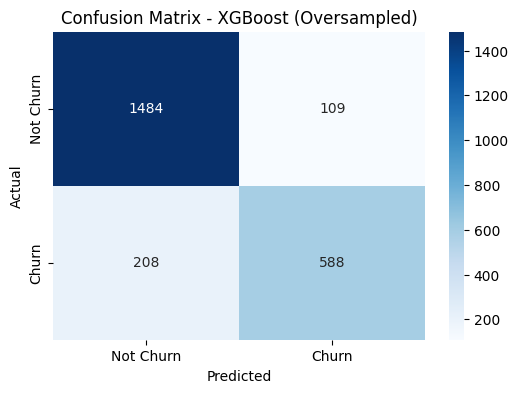

[LightGBM] [Info] Number of positive: 3185, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1346
[LightGBM] [Info] Number of data points in the train set: 9555, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
Dataset: Oversampled | Model: LightGBM
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.86      0.74      0.80       796

    accuracy                           0.87      2389
   macro avg       0.87      0.84      0.85      2389
weighted avg       0.87      0.87      0.87      2389

--------------------------------------------------


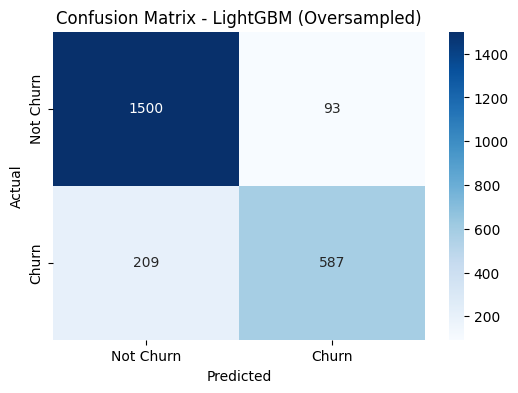

Dataset: Oversampled | Model: CatBoost
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1593
           1       0.88      0.75      0.81       796

    accuracy                           0.88      2389
   macro avg       0.88      0.85      0.86      2389
weighted avg       0.88      0.88      0.88      2389

--------------------------------------------------


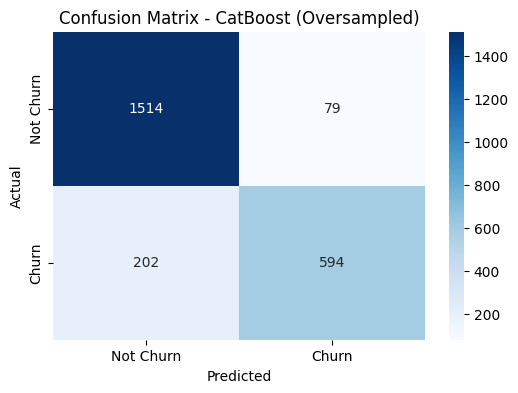

Dataset: Undersampled | Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       509
           1       0.68      0.60      0.64       408

    accuracy                           0.70       917
   macro avg       0.69      0.69      0.69       917
weighted avg       0.70      0.70      0.69       917

--------------------------------------------------


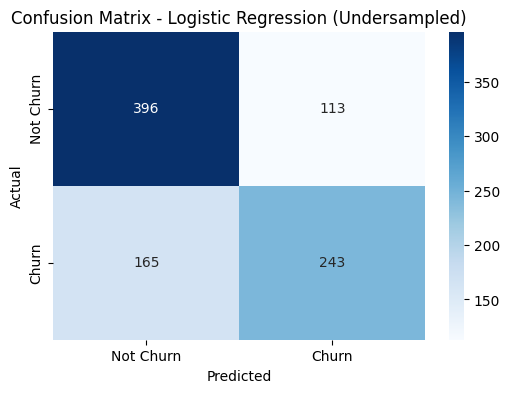

Dataset: Undersampled | Model: Random Forest
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       509
           1       0.76      0.70      0.73       408

    accuracy                           0.77       917
   macro avg       0.77      0.76      0.76       917
weighted avg       0.77      0.77      0.77       917

--------------------------------------------------


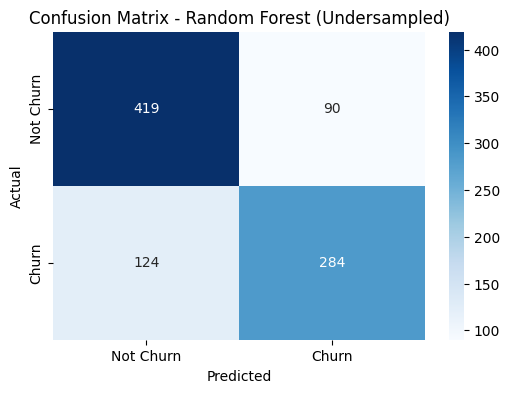

Dataset: Undersampled | Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       509
           1       0.78      0.71      0.74       408

    accuracy                           0.78       917
   macro avg       0.78      0.78      0.78       917
weighted avg       0.78      0.78      0.78       917

--------------------------------------------------


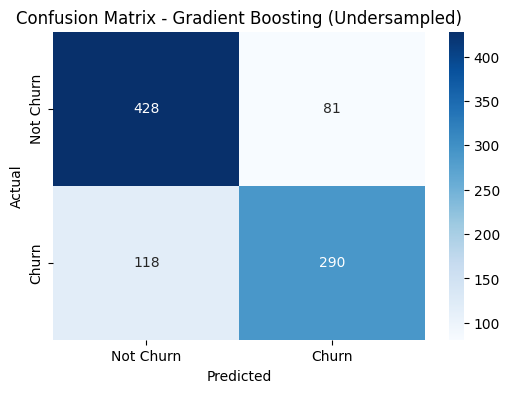

Dataset: Undersampled | Model: AdaBoost
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       509
           1       0.76      0.71      0.73       408

    accuracy                           0.77       917
   macro avg       0.77      0.76      0.77       917
weighted avg       0.77      0.77      0.77       917

--------------------------------------------------


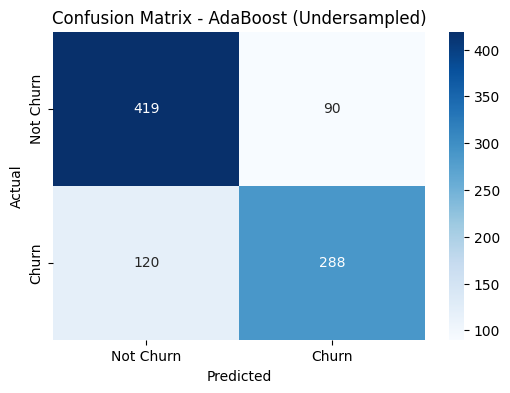

Dataset: Undersampled | Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       509
           1       0.81      0.70      0.75       408

    accuracy                           0.79       917
   macro avg       0.79      0.78      0.78       917
weighted avg       0.79      0.79      0.79       917

--------------------------------------------------


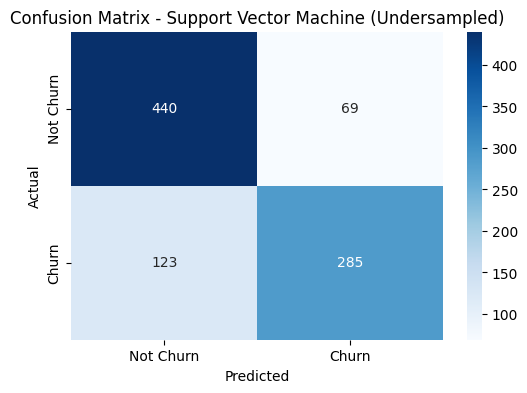

Dataset: Undersampled | Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       509
           1       0.74      0.65      0.70       408

    accuracy                           0.75       917
   macro avg       0.75      0.74      0.74       917
weighted avg       0.75      0.75      0.74       917

--------------------------------------------------


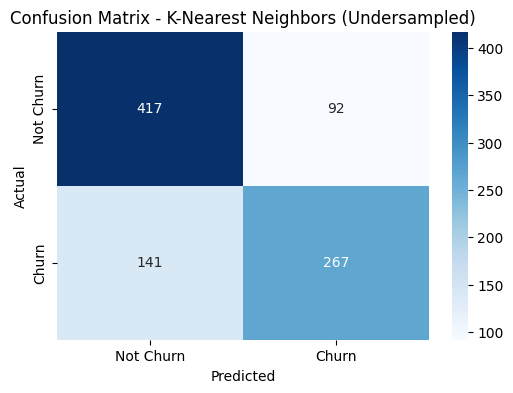

Dataset: Undersampled | Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       509
           1       0.74      0.68      0.71       408

    accuracy                           0.75       917
   macro avg       0.75      0.74      0.74       917
weighted avg       0.75      0.75      0.75       917

--------------------------------------------------


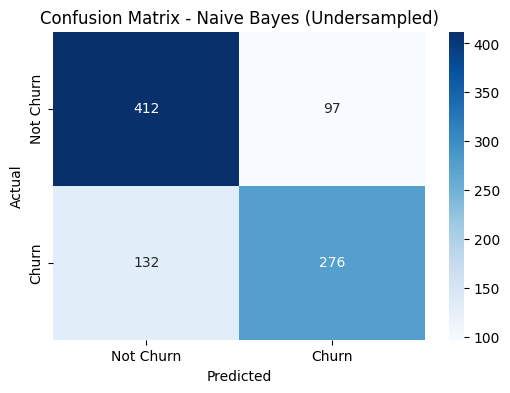

Dataset: Undersampled | Model: Decision Tree
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       509
           1       0.67      0.66      0.66       408

    accuracy                           0.70       917
   macro avg       0.70      0.70      0.70       917
weighted avg       0.70      0.70      0.70       917

--------------------------------------------------


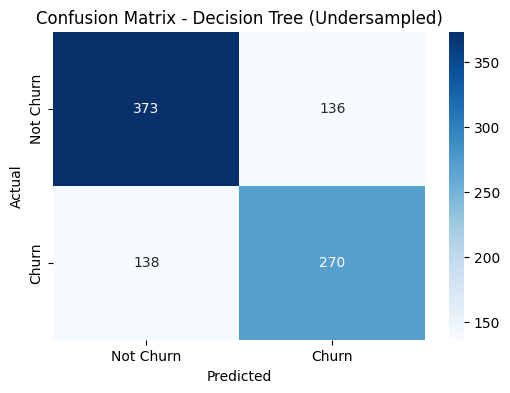

Dataset: Undersampled | Model: XGBoost
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       509
           1       0.75      0.73      0.74       408

    accuracy                           0.77       917
   macro avg       0.77      0.76      0.76       917
weighted avg       0.77      0.77      0.77       917

--------------------------------------------------


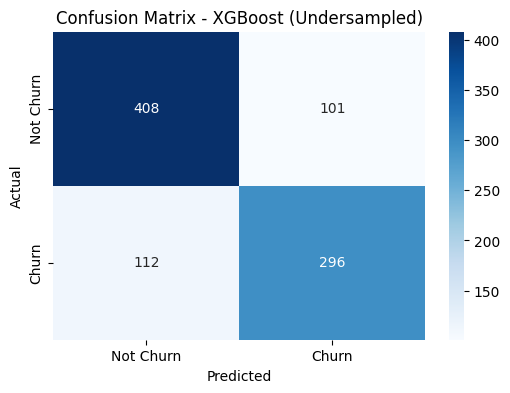

[LightGBM] [Info] Number of positive: 1629, number of negative: 2037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 3666, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444354 -> initscore=-0.223512
[LightGBM] [Info] Start training from score -0.223512
Dataset: Undersampled | Model: LightGBM
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       509
           1       0.77      0.72      0.74       408

    accuracy                           0.78       917
   macro avg       0.78      0.77      0.78       917
weighted avg       0.78      0.78      0.78       917

--------------------------------------------------


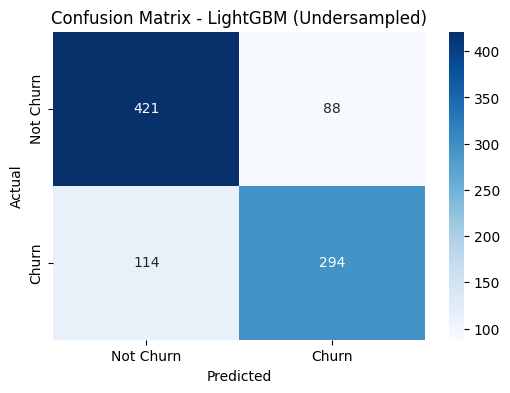

Dataset: Undersampled | Model: CatBoost
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       509
           1       0.79      0.74      0.76       408

    accuracy                           0.79       917
   macro avg       0.79      0.79      0.79       917
weighted avg       0.79      0.79      0.79       917

--------------------------------------------------


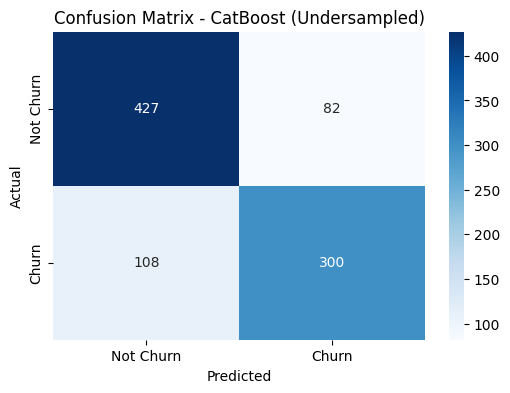

In [ ]:
# Train and evaluate models on normal, oversampled, and undersampled data
results_normal = train_evaluate(models, X_train, X_test, y_train, y_test, "Normal")
results_smote = train_evaluate(models, X_train_smote, X_test_smote, y_train_smote, y_test_smote, "Oversampled")
results_under = train_evaluate(models, X_train_under, X_test_under, y_train_under, y_test_under, "Undersampled")

# Combine results into a DataFrame
df_results = pd.DataFrame(results_normal + results_smote + results_under, columns=["Dataset", "Model", "Accuracy", "Precision", "Recall", "F1 Score"])


In [ ]:
df_results

,Dataset,Model,Accuracy,Precision,Recall,F1 Score
0,Normal,Logistic Regression,0.815500,0.626667,0.230958,0.337522
1,Normal,Random Forest,0.865500,0.787500,0.464373,0.584235
2,Normal,Gradient Boosting,0.872500,0.804000,0.493857,0.611872
3,Normal,AdaBoost,0.855000,0.725869,0.461916,0.564565
4,Normal,Support Vector Machine,0.859000,0.841530,0.378378,0.522034
5,Normal,K-Nearest Neighbors,0.839000,0.676349,0.400491,0.503086
6,Normal,Naive Bayes,0.820000,0.595918,0.358722,0.447853
7,Normal,Decision Tree,0.784500,0.473913,0.535627,0.502884
8,Normal,XGBoost,0.848500,0.673333,0.496314,0.571429
9,Normal,LightGBM,0.861000,0.750973,0.474201,0.581325


To determine the best model, let's analyze the **F1 Score**, which balances **Precision** and **Recall**, especially for imbalanced datasets like churn prediction.

### **Top Models per Dataset Type:**
- **Normal Data:**  
  - **Gradient Boosting:** F1 = **0.611872**  
  - **Random Forest:** F1 = **0.584235**  
  - **CatBoost:** F1 = **0.591463**

- **Oversampled Data (SMOTE):**  
  - **CatBoost:** F1 = **0.808713** ✅ *Best Overall*  
  - **LightGBM:** F1 = **0.795393**  
  - **XGBoost:** F1 = **0.787676**  

- **Undersampled Data:**  
  - **CatBoost:** F1 = **0.759494**  
  - **Gradient Boosting:** F1 = **0.744544**  
  - **LightGBM:** F1 = **0.744304**  

### **Conclusion:**
📌 **Best Model Overall → CatBoost (SMOTE-Oversampled) with F1 = 0.8087**  
✅ **Recommendation:** Use **CatBoost with Oversampled Data** (SMOTE) for the best balance of **precision and recall** in churn prediction.


# Hyperparameter Tuning

Fitting 3 folds for each of 81 candidates, totalling 243 fits
✅ Best Hyperparameters: {'depth': 6, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
⭐ Best CatBoost Model - F1 Score: 0.8066

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.88      0.74      0.81       796

    accuracy                           0.88      2389
   macro avg       0.88      0.85      0.86      2389
weighted avg       0.88      0.88      0.88      2389



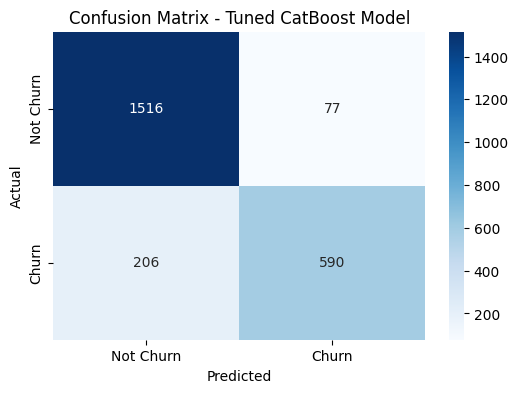

In [ ]:
# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameter grid for CatBoost
param_grid = {
    'iterations': [100, 200, 300],  # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'depth': [4, 6, 8],  # Depth of trees
    'l2_leaf_reg': [1, 3, 5],  # L2 regularization term
}

# Initialize CatBoost model
catboost_model = CatBoostClassifier(verbose=0, random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    catboost_model,
    param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1',  # Optimizing for F1 score
    n_jobs=-1,  # Use all processors
    verbose=1
)

# Fit Grid Search on Oversampled Data (SMOTE)
grid_search.fit(X_train_smote, y_train_smote)

# Get best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate best model on test data
y_pred_best = best_model.predict(X_test_smote)
precision = precision_score(y_test_smote, y_pred_best)
recall = recall_score(y_test_smote, y_pred_best)
f1 = f1_score(y_test_smote, y_pred_best)
conf_matrix = confusion_matrix(y_test_smote, y_pred_best)

# Display best parameters and results
print("✅ Best Hyperparameters:", best_params)
print(f"⭐ Best CatBoost Model - F1 Score: {f1:.4f}")
print("\n🔹 Classification Report:\n", classification_report(y_test_smote, y_pred_best))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned CatBoost Model')
plt.show()


**Insights:**

1. **Before Hyperparameter Tuning:**  
   - **F1-Score:** 0.8087 (Best overall model).  
   - **Performance:** Achieved optimal balance between precision (88.26%) and recall (74.62%).  

2. **After Hyperparameter Tuning:**  
   - **F1-Score:** Slightly decreased to 0.8066.  
   - **Performance:** Marginal improvement in reducing false positives but slight decline in recall.  

**Conclusion:** The pre-tuned CatBoost model performs slightly better overall, demonstrating that default parameters can achieve optimal performance for this dataset.

# Feature Importance

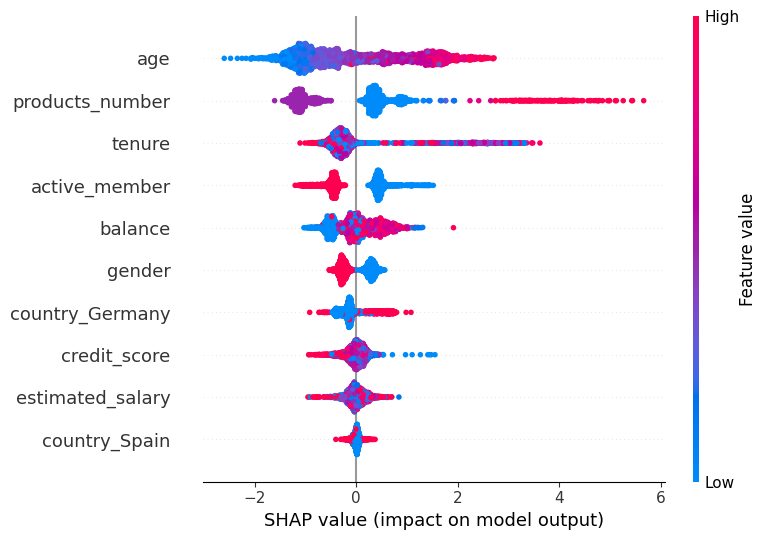

In [ ]:
# Import SHAP
import shap

# Initialize SHAP explainer with CPU
explainer = shap.TreeExplainer(best_model, feature_perturbation="interventional")

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test_smote)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_test_smote, feature_names=X.columns)


### **Analysis of Feature Importance Results**

From the visualizations provided (SHAP summary plot and CatBoost's built-in feature importance):

---

- **Key Insights:**
  - **Age**: Older customers (higher values in red) are more likely to churn, while younger customers (blue) are less likely.
  - **Products Number**: Having fewer products (blue) increases churn risk.
  - **Tenure**: Longer tenure (red) reduces churn risk significantly, while shorter tenure (blue) increases it.
  - **Balance**: Higher balance seems correlated with churn, as seen by the concentration of red points on the positive SHAP value side.
  - **Active Member**: Non-active members (blue) are more prone to churn.
  - **Country**: Customers in **Germany** and **Spain** seem more likely to churn compared to the baseline (France).

---

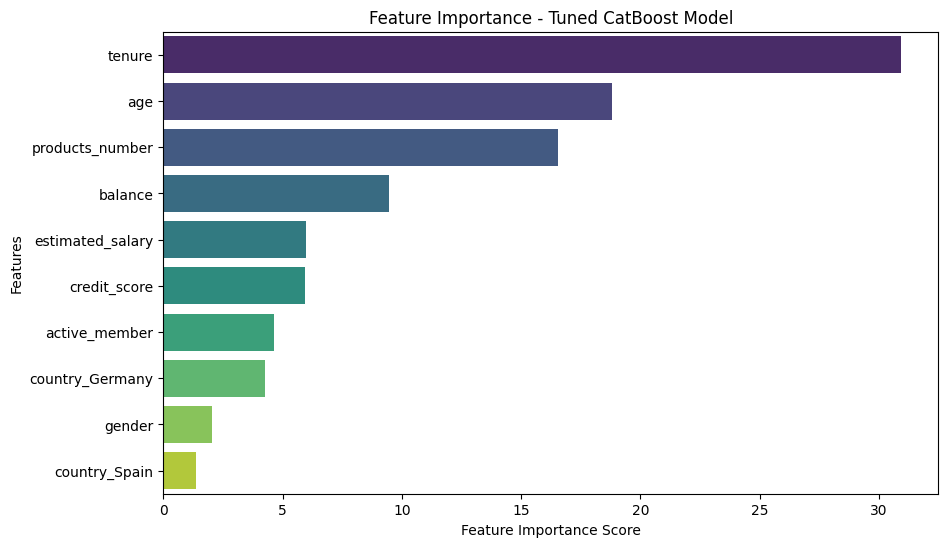

In [ ]:
# Extract feature importance from the tuned CatBoost model
feature_importance = best_model.get_feature_importance()
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance - Tuned CatBoost Model')
plt.show()



---

### **2. CatBoost Feature Importance**
- **Explanation:**
  - Shows the relative importance of features in determining churn.
  - **Tenure** and **Age** are the most critical factors for churn prediction.

- **Key Insights:**
  - **Tenure**: The most influential feature. Customers with longer tenure are less likely to churn.
  - **Age**: Older customers contribute significantly to churn predictions.
  - **Products Number**: Customers with fewer products are more likely to churn, as they may feel less engaged with the services.
  - **Balance**: Indicates customers with higher account balances might churn, possibly due to dissatisfaction despite their wealth.
  - **Country**: Customers from **Germany** and **Spain** have distinct churn patterns compared to France, potentially due to cultural or service-related differences.




### **Comparison of SHAP and CatBoost Feature Importance**
- Both methods agree on the **top features** influencing churn:
  - **Tenure**: Strongly reduces churn risk for long-tenure customers.
  - **Age**: Older customers are more at risk of churn.
  - **Products Number**: Fewer products correlate with higher churn risk.
  - **Balance** and **Country** also play significant roles, although their contributions are less than Tenure and Age.

---

### **Recommendations:**
1. **Focus on Retaining High-Risk Customers:**
   - Younger customers with **short tenure**.
   - Customers with **fewer products**.
   - **Inactive members** should be engaged with personalized offers or campaigns.

2. **Country-Specific Strategies:**
   - Investigate reasons for churn in **Germany** and **Spain**.
   - Tailor marketing and customer service initiatives to address their specific needs.

3. **Promote Product Usage:**
   - Encourage cross-selling of additional products to increase engagement.

4. **Customer Segmentation:**
   - Segment customers by tenure, age, and product usage to target retention efforts more effectively.

---

# Business Recommendations

## **Reducing Churn**
1. **Address High-Churn Age Groups:**
   - Older customers are more likely to churn based on their SHAP value impact. Provide special offers, personalized communication, or financial advisory services to retain this demographic.
   - Younger customers with low tenure should be targeted with onboarding programs to improve engagement.

2. **Focus on Low-Tenure Customers:**
   - Tenure is the most significant factor in churn prediction. Implement programs that incentivize loyalty in the early stages of a customer's lifecycle, such as welcome discounts or initial rewards for milestone completions.

3. **Improve Retention for Low-Balance Customers:**
   - Customers with lower balances are more prone to churn. Introduce flexible payment plans or rewards for increasing their account balance.

4. **Tailor Strategies Based on Country Segmentation:**
   - Customers from Spain and Germany show distinct churn behaviors. Develop country-specific campaigns, such as language-specific messaging or culturally relevant promotions, to engage these customer segments.

5. **Enhance Engagement for Low Product Usage:**
   - Customers with fewer products are at higher churn risk. Cross-sell relevant products or services to enhance their involvement and loyalty to the company.

---

## **Optimizing Customer Lifetime Value (CLV)**
1. **Leverage High CLV Segments (VIP & High):**
   - Focus on upselling and premium offers for VIP and High CLV customers. For instance, offer premium services or tiered loyalty benefits that align with their high spending capacity.

2. **Promote Balanced Spending:**
   - Encourage Medium CLV customers to move into higher tiers by offering exclusive rewards for additional purchases or higher product engagement.

3. **Increase Tenure for Higher CLV:**
   - The relationship between tenure and CLV suggests a need to promote long-term contracts or retention campaigns that reward customers for staying longer.

4. **Monitor Credit Score Impact:**
   - Customers with lower credit scores tend to churn more. Provide financial education programs or personalized financial advice to help these customers improve their credit behavior.

5. **Incentivize Product Expansion:**
   - Customers with more products tend to have higher CLV. Use bundling strategies or discounts for adding more products to increase overall customer value.

---

## **Specific Campaign Suggestions**
- **"Stay Longer, Save More" Campaign:** Offer progressive discounts or rewards for customers as their tenure increases.
- **Balance Boost Program:** Incentivize customers with low balances by introducing cashback rewards for reaching higher balance thresholds.
- **Country-Specific Promotions:** Launch campaigns tailored for Spain and Germany to address their unique churn risks and preferences.
- **Cross-Selling Initiatives:** Highlight complementary products to low-product customers through targeted recommendations.

These recommendations are grounded in the patterns identified in the data, addressing both the key drivers of churn and the factors influencing CLV to maximize customer retention and revenue growth.